# 7. 해수욕장 지도 그리기

## 1. 해수욕장 정보 불러오기

### 1-1. 공공데이터포털 api 활용하여 json 형식으로 불러오기

In [1]:
import requests
import pprint
import json

In [5]:
url = ''
# url 불러오기
response = requests.get(url)

contents = response.text

pprint를 사용할 경우 보다 알아보기 쉽게 데이터 형태를 만들 수 있다.
indent=4는 들여쓴다는 의미

In [6]:
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

('{"getOceansBeachInfo":{"header":{"code":"00","message":"NORMAL '
 'SERVIE"},"item":[{"num":1,"sido_nm":"제주","gugun_nm":"서귀포시","sta_nm":"신양섭지코지","beach_wid":80.000,"beach_len":300.000,"beach_knd":"모래","link_addr":"http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG02&act=view&seq=248","link_nm":"제주놀멍쉬멍","beach_img":null,"link_tel":"동부보건소성산지소(064-782-2368)","lat":"33.4348090000","lon":"126.9230210000"},{"num":2,"sido_nm":"제주","gugun_nm":"서귀포시","sta_nm":"중문색달","beach_wid":70.000,"beach_len":560.000,"beach_knd":"모래","link_addr":"http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG01&act=view&seq=295","link_nm":"제주놀멍쉬멍","beach_img":null,"link_tel":"서귀포시중문보건지소(064-738-1605)","lat":"33.2451250000","lon":"126.4114820000"},{"num":3,"sido_nm":"제주","gugun_nm":"서귀포시","sta_nm":"표선해비치","beach_wid":400.000,"beach_len":400.000,"beach_knd":null,"link_addr":"http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG02&act=view&seq=369","link_nm":"제주놀멍쉬멍","bea

### 1-2. 출력된 문자열 json 형태로 변형하기
출력된 문자열을 json(JavaScript Object Notation) 형태로 변형시켜준다

In [7]:
json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob))

{'getOceansBeachInfo': {'header': {'code': '00', 'message': 'NORMAL SERVIE'}, 'item': [{'num': 1, 'sido_nm': '제주', 'gugun_nm': '서귀포시', 'sta_nm': '신양섭지코지', 'beach_wid': 80.0, 'beach_len': 300.0, 'beach_knd': '모래', 'link_addr': 'http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG02&act=view&seq=248', 'link_nm': '제주놀멍쉬멍', 'beach_img': None, 'link_tel': '동부보건소성산지소(064-782-2368)', 'lat': '33.4348090000', 'lon': '126.9230210000'}, {'num': 2, 'sido_nm': '제주', 'gugun_nm': '서귀포시', 'sta_nm': '중문색달', 'beach_wid': 70.0, 'beach_len': 560.0, 'beach_knd': '모래', 'link_addr': 'http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG01&act=view&seq=295', 'link_nm': '제주놀멍쉬멍', 'beach_img': None, 'link_tel': '서귀포시중문보건지소(064-738-1605)', 'lat': '33.2451250000', 'lon': '126.4114820000'}, {'num': 3, 'sido_nm': '제주', 'gugun_nm': '서귀포시', 'sta_nm': '표선해비치', 'beach_wid': 400.0, 'beach_len': 400.0, 'beach_knd': None, 'link_addr': 'http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=

### 1-3. 필요한 정보 가져오기
지도를 그릴 때 필요한 정보인 '해수욕장 정보'는 getOceansBeachInfo => item 안에 모두 포함되어 있음을 확인할 수 있다.<br>
따라서 item의 내용만 출력해보면

In [18]:
item = json_ob['getOceansBeachInfo']['item']
print(item)

[{'num': 1, 'sido_nm': '제주', 'gugun_nm': '서귀포시', 'sta_nm': '신양섭지코지', 'beach_wid': 80.0, 'beach_len': 300.0, 'beach_knd': '모래', 'link_addr': 'http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG02&act=view&seq=248', 'link_nm': '제주놀멍쉬멍', 'beach_img': None, 'link_tel': '동부보건소성산지소(064-782-2368)', 'lat': '33.4348090000', 'lon': '126.9230210000'}, {'num': 2, 'sido_nm': '제주', 'gugun_nm': '서귀포시', 'sta_nm': '중문색달', 'beach_wid': 70.0, 'beach_len': 560.0, 'beach_knd': '모래', 'link_addr': 'http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG01&act=view&seq=295', 'link_nm': '제주놀멍쉬멍', 'beach_img': None, 'link_tel': '서귀포시중문보건지소(064-738-1605)', 'lat': '33.2451250000', 'lon': '126.4114820000'}, {'num': 3, 'sido_nm': '제주', 'gugun_nm': '서귀포시', 'sta_nm': '표선해비치', 'beach_wid': 400.0, 'beach_len': 400.0, 'beach_knd': None, 'link_addr': 'http://www.jejutour.go.kr/contents/index.php?mid=TU&cat=TU03&dong=SG02&act=view&seq=369', 'link_nm': '제주놀멍쉬멍', 'beach_img': None, 'link_tel': 

### 1-4. 데이터프레임 형태로 저장하기
데이터프레임 형태로 변환시킨 후 변환된 데이터프레임을 csv파일로 저장해보자

In [21]:
import pandas as pd

dataframe = pd.json_normalize(item)

print(dataframe)

result = dataframe.to_csv('result.csv', index=False, encoding='CP949')

    num sido_nm gugun_nm  sta_nm  beach_wid  beach_len beach_knd  \
0     1      제주     서귀포시  신양섭지코지       80.0      300.0        모래   
1     2      제주     서귀포시    중문색달       70.0      560.0        모래   
2     3      제주     서귀포시   표선해비치      400.0      400.0      None   
3     4      제주     서귀포시   화순금모래       40.0      250.0        모래   
4     5      제주      제주시    곽지과물        0.0        0.0        모래   
5     6      제주      제주시   금능으뜸원        NaN        NaN      None   
6     7      제주      제주시   김녕성세기        0.0        0.0        모래   
7     8      제주      제주시  삼양검은모래        NaN        NaN      None   
8     9      제주      제주시    이호테우       60.0      600.0        모래   
9    10      제주      제주시   함덕서우봉      257.0      900.0        모래   
10   11      제주      제주시      협재        0.0        0.0        모래   

                                            link_addr link_nm beach_img  \
0   http://www.jejutour.go.kr/contents/index.php?m...  제주놀멍쉬멍      None   
1   http://www.jejutour.go.kr/con

## 2. 행정경계 데이터(제주) 불러오기

### 2-1. 국토지리원에서 제공하는 행정경계데이터의 형태를  확인

In [34]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

jeju_sgg = gpd.read_file("C:/Users/GBOOK/PythonGeoSpatialAnalysis/archive/LARD_ADM_SECT_SGG_제주/LARD_ADM_SECT_SGG_50_202405.shp")
jeju_sgg


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,50110,제주도 제주시,690,50110,"MULTIPOLYGON (((122257.877 76973.731, 122258.1..."
1,50130,제주도 서귀포시,659,50130,"MULTIPOLYGON (((131721.35 57965.02, 131719.25 ..."


불러온 jeju_sgg의 정보를 확인해보면 geodataframe 형태로 불러왔음을 알 수 있다.

In [35]:
jeju_sgg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_SECT_C  2 non-null      object  
 1   SGG_NM      2 non-null      object  
 2   SGG_OID     2 non-null      int32   
 3   COL_ADM_SE  2 non-null      object  
 4   geometry    2 non-null      geometry
dtypes: geometry(1), int32(1), object(3)
memory usage: 204.0+ bytes


## 3. 해수욕장 csv파일 geodataframe으로 변환

### 3-1. 데이터 시각화

In [36]:
# pandas를 통해 해수욕장 csv 파일 불러기기
jeju_beach = pd.read_csv("C:/Users/GBOOK/PythonGeoSpatialAnalysis/result.csv", encoding='CP949')
jeju_beach

,num,sido_nm,gugun_nm,sta_nm,beach_wid,beach_len,beach_knd,link_addr,link_nm,beach_img,link_tel,lat,lon
0,1,제주,서귀포시,신양섭지코지,80.0,300.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,동부보건소성산지소(064-782-2368),33.434809,126.923021
1,2,제주,서귀포시,중문색달,70.0,560.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,서귀포시중문보건지소(064-738-1605),33.245125,126.411482
2,3,제주,서귀포시,표선해비치,400.0,400.0,NaN,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,동부보건소표선지소(064-787-1304),33.327998,126.837355
3,4,제주,서귀포시,화순금모래,40.0,250.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,서귀포시서부보건소안덕보건지소(064-794-9101),33.239967,126.333709
4,5,제주,제주시,곽지과물,0.0,0.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,북제주군애월읍납읍보건진료소(064-799-4686),33.450627,126.304716
5,6,제주,제주시,금능으뜸원,NaN,NaN,NaN,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시서부보건소(064-796-2911),33.389768,126.235091
6,7,제주,제주시,김녕성세기,0.0,0.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시동부보건소(064-783-5042),33.557734,126.759463
7,8,제주,제주시,삼양검은모래,NaN,NaN,NaN,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시동부보건소조천보건지소(064-783-6249),33.526016,126.585804
8,9,제주,제주시,이호테우,60.0,600.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,노형보건지소(064-728-8721),33.497263,126.451821
9,10,제주,제주시,함덕서우봉,257.0,900.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시동부보건소조천보건지소(064-783-6249),33.543276,126.669279


In [37]:
# 데이터에 lat, lon 컬럼이 존재한다.
jeju_beach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        11 non-null     int64  
 1   sido_nm    11 non-null     object 
 2   gugun_nm   11 non-null     object 
 3   sta_nm     11 non-null     object 
 4   beach_wid  9 non-null      float64
 5   beach_len  9 non-null      float64
 6   beach_knd  8 non-null      object 
 7   link_addr  11 non-null     object 
 8   link_nm    11 non-null     object 
 9   beach_img  0 non-null      float64
 10  link_tel   11 non-null     object 
 11  lat        11 non-null     float64
 12  lon        11 non-null     float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ KB


In [38]:
# geometry 컬럼을 새롭게 생성해주고 lat, lon 좌표 컬럼을 lambda 함수로 입력한다.
jeju_beach['geometry'] = jeju_beach.apply(lambda row: Point([row['lon'], row['lat']]), axis=1)
# geometry 컬럼이 추가된 jeju_beach 데이터를 GeoDataFrame으로 변환해준다.
jeju_beach = gpd.GeoDataFrame(jeju_beach, geometry='geometry')
jeju_beach

,num,sido_nm,gugun_nm,sta_nm,beach_wid,beach_len,beach_knd,link_addr,link_nm,beach_img,link_tel,lat,lon,geometry
0,1,제주,서귀포시,신양섭지코지,80.0,300.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,동부보건소성산지소(064-782-2368),33.434809,126.923021,POINT (126.92302 33.43481)
1,2,제주,서귀포시,중문색달,70.0,560.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,서귀포시중문보건지소(064-738-1605),33.245125,126.411482,POINT (126.41148 33.24512)
2,3,제주,서귀포시,표선해비치,400.0,400.0,NaN,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,동부보건소표선지소(064-787-1304),33.327998,126.837355,POINT (126.83736 33.328)
3,4,제주,서귀포시,화순금모래,40.0,250.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,서귀포시서부보건소안덕보건지소(064-794-9101),33.239967,126.333709,POINT (126.33371 33.23997)
4,5,제주,제주시,곽지과물,0.0,0.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,북제주군애월읍납읍보건진료소(064-799-4686),33.450627,126.304716,POINT (126.30472 33.45063)
5,6,제주,제주시,금능으뜸원,NaN,NaN,NaN,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시서부보건소(064-796-2911),33.389768,126.235091,POINT (126.23509 33.38977)
6,7,제주,제주시,김녕성세기,0.0,0.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시동부보건소(064-783-5042),33.557734,126.759463,POINT (126.75946 33.55773)
7,8,제주,제주시,삼양검은모래,NaN,NaN,NaN,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시동부보건소조천보건지소(064-783-6249),33.526016,126.585804,POINT (126.5858 33.52602)
8,9,제주,제주시,이호테우,60.0,600.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,노형보건지소(064-728-8721),33.497263,126.451821,POINT (126.45182 33.49726)
9,10,제주,제주시,함덕서우봉,257.0,900.0,모래,http://www.jejutour.go.kr/contents/index.php?m...,제주놀멍쉬멍,NaN,제주시동부보건소조천보건지소(064-783-6249),33.543276,126.669279,POINT (126.66928 33.54328)


In [39]:
jeju_beach.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   num        11 non-null     int64   
 1   sido_nm    11 non-null     object  
 2   gugun_nm   11 non-null     object  
 3   sta_nm     11 non-null     object  
 4   beach_wid  9 non-null      float64 
 5   beach_len  9 non-null      float64 
 6   beach_knd  8 non-null      object  
 7   link_addr  11 non-null     object  
 8   link_nm    11 non-null     object  
 9   beach_img  0 non-null      float64 
 10  link_tel   11 non-null     object  
 11  lat        11 non-null     float64 
 12  lon        11 non-null     float64 
 13  geometry   11 non-null     geometry
dtypes: float64(5), geometry(1), int64(1), object(7)
memory usage: 1.3+ KB


## 4. 데이터 좌표계 정의

In [40]:
# 지리원의 행정경계 데이터의 좌표계 확인
print(jeju_sgg.crs)
# EPSG 5186
print(jeju_beach.crs)

PROJCS["Korea_2000_Korea_Central_Belt_2010",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
None


In [42]:
jeju_sgg.crs = {'init':'epsg:5186'}
jeju_beach.crs = {'init':'epsg:4326'}

In [43]:
# jeju_sgg(행정경계 데이터)와 jeju_beach(제주 해수욕장) 데이터의 좌표계가 서로 일치하지 않는다. 
print(jeju_sgg.crs)
print(jeju_beach.crs)

+init=epsg:5186 +type=crs
+init=epsg:4326 +type=crs


In [44]:
# jeju_beach 데이터를 jeju_sgg 데이터의 좌표계와 일치하도록 설정한다.
jeju_beach = jeju_beach.to_crs({'init':'epsg:5186'})
print(jeju_beach.crs)

+init=epsg:5186 +type=crs


## 5. 맵에 그리기

In [56]:
# folium map 대신 matplotlib을 활용해서 plot을 생성한다.
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic')



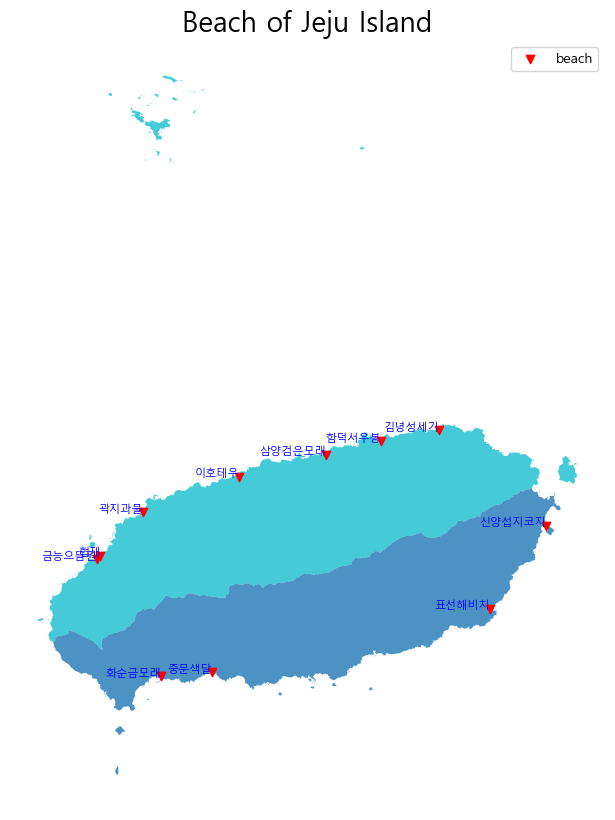

In [59]:
ax = jeju_sgg.plot(column='SGG_NM', figsize=(10, 10), alpha=0.8)
jeju_beach.plot(ax=ax, marker='v', color='red', label='beach')

for x, y, label in zip(jeju_beach.geometry.x, jeju_beach.geometry.y, jeju_beach['sta_nm']):
    ax.text(x, y, label, fontsize=8, ha='right', color='blue')
    
ax.set_title('Beach of Jeju Island', fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

<제주도 해수욕장 시각화>
- API를 호출하여 JSON 파일로 저장 및 필요한 데이터만 추출한다.
- 좌표정보가 포함된 csv파일을 GeoDataFrame 형태로 변환한다.
- 좌표계가 서로 일치하지 않은 두 개의 데이터가 존재할 경우 좌표계를 통일한다.
- 데이터를 plot하여 표현한다.